# Smart Grid City Dataset – Import & Exploratory Data Analysis (EDA)

## Step 0 – Library Imports & Display Settings

In this step we import all required Python libraries and configure some global settings:

- `pandas` and `numpy` for data manipulation and numerical operations.
- `matplotlib` and `seaborn` for visualizations.
- `datetime` for timestamping the EDA report.
- `warnings` to suppress non-critical warnings for cleaner output.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Display Settings Configuration

This block configures global display settings for both **visualizations** and **tabular output** to ensure that all results in the notebook are clear, readable, and visually consistent.


In [7]:
# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)            

## Step 1 – Load Data

 Load the CSV file into a pandas `DataFrame` named `df`.
 Print a confirmation message and the shape of the dataset.

>  **Note:** Update the file path to match the location of your dataset on your own machine if necessary.

In [8]:

# =============================================================================
# STEP 1: Load Data
# =============================================================================
# Load data
df = pd.read_csv('C:\\0_DA\\Iot_DataAnalyst\\smart_grid_dataset_city_modified.csv') # Replace with your file name
print(" Data loaded successfully!")
print(f"Shape: {df.shape}")

 Data loaded successfully!
Shape: (50010, 27)


## Step 2 – Initial Data Inspection
### Display Settings Configuration

This section configures global display settings for both visualizations and tabular output. 
The goal is to ensure that charts and DataFrame outputs are clear, readable, and consistently formatted throughout the notebook.


In [2]:
# =============================================================================
# STEP 2: Initial Data Inspection
# =============================================================================
print("\n" + "=" * 80)
print("STEP 2: INITIAL DATA INSPECTION")
print("=" * 80)

# 2.1 Basic Information
print("\n--- 2.1 Dataset Information ---")
df.info()

# 2.2 First and Last Rows
print("\n--- 2.2 First 5 Rows ---")
print(df.head())

print("\n--- 2.3 Last 5 Rows ---")
print(df.tail())

# 2.3 Data Types
print("\n--- 2.4 Data Types ---")
print(df.dtypes.value_counts())


STEP 2: INITIAL DATA INSPECTION

--- 2.1 Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50010 entries, 0 to 50009
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    50010 non-null  object 
 1   City                         50010 non-null  object 
 2   Name                         50010 non-null  object 
 3   Country                      50010 non-null  object 
 4   region                       50010 non-null  object 
 5   Voltage (V)                  50010 non-null  float64
 6   Current (A)                  50010 non-null  float64
 7   Power Consumption (kW)       50010 non-null  float64
 8   Reactive Power (kVAR)        50010 non-null  float64
 9   Power Factor                 50010 non-null  float64
 10  Solar Power (kW)             50010 non-null  float64
 11  Wind Power (kW)              50010 non-null  float64
 12  Grid Sup

### Step 3 – Exploratory Data Analysis (EDA)

This step performs a structured and systematic exploratory analysis of the dataset. 
The goal is to understand the basic statistical properties of the data, identify potential quality issues, 
and obtain insights that will guide the cleaning and preprocessing steps.

The EDA includes the following sub-sections:

In [13]:
# =============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
print("\n" + "=" * 80)
print("STEP 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

# 3.1 Statistical Summary
print("\n--- 3.1 Statistical Summary (Numeric Columns) ---")
print(df.describe())

print("\n--- 3.2 Statistical Summary (All Columns) ---")
print(df.describe(include='all'))

# 3.3 Missing Values Analysis
print("\n--- 3.3 Missing Values Analysis ---")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)
print(missing_df)

# 3.4 Duplicate Analysis
print("\n--- 3.4 Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates} ({duplicates / len(df) * 100:.2f}%)")
if duplicates > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))

# 3.5 Unique Values Analysis
print("\n--- 3.5 Unique Values in Each Column ---")
unique_df = pd.DataFrame({
    'Column': df.columns,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Sample_Values': [df[col].unique()[:5] for col in df.columns]
})
print(unique_df)


STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

--- 3.1 Statistical Summary (Numeric Columns) ---
        Voltage (V)   Current (A)  Power Consumption (kW)  \
count  50010.000000  50010.000000            50010.000000   
mean     230.148571     27.518828                6.320570   
std       10.028706     13.209750                2.990116   
min      207.671981      5.001239                1.089178   
25%      226.609736     16.147817                3.706780   
50%      230.009964     27.584660                6.339975   
75%      233.389333     38.786939                8.913987   
max      759.585933    282.258491               12.103199   

       Reactive Power (kVAR)  Power Factor  Solar Power (kW)  Wind Power (kW)  \
count           50010.000000  50010.000000      50010.000000     50010.000000   
mean                1.584056      0.899997         25.075866        15.008227   
std                 0.964820      0.057741         14.434712         8.662999   
min                 0.113665      

### Step 4 – Distribution Analysis (Numeric Columns)

In this step, we analyze the **distributional properties** of all numeric variables in the dataset. 
Understanding these statistical characteristics is essential before performing data cleaning, 
outlier removal, feature scaling, or modeling.


In [10]:
# =============================================================================
# STEP 4: DISTRIBUTION ANALYSIS (Numeric Columns)
# =============================================================================
print("\n" + "=" * 80)
print("STEP 4: DISTRIBUTION ANALYSIS")
print("=" * 80)

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\n--- Distribution of {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")



STEP 4: DISTRIBUTION ANALYSIS

--- Distribution of Voltage (V) ---
Mean: 230.15
Median: 230.01
Std: 10.03
Min: 207.67
Max: 759.59
Skewness: 37.65
Kurtosis: 1887.82

--- Distribution of Current (A) ---
Mean: 27.52
Median: 27.58
Std: 13.21
Min: 5.00
Max: 282.26
Skewness: 0.47
Kurtosis: 6.03

--- Distribution of Power Consumption (kW) ---
Mean: 6.32
Median: 6.34
Std: 2.99
Min: 1.09
Max: 12.10
Skewness: -0.00
Kurtosis: -1.20

--- Distribution of Reactive Power (kVAR) ---
Mean: 1.58
Median: 1.39
Std: 0.96
Min: 0.11
Max: 4.68
Skewness: 0.70
Kurtosis: -0.28

--- Distribution of Power Factor ---
Mean: 0.90
Median: 0.90
Std: 0.06
Min: 0.80
Max: 1.00
Skewness: -0.00
Kurtosis: -1.20

--- Distribution of Solar Power (kW) ---
Mean: 25.08
Median: 25.03
Std: 14.43
Min: 0.00
Max: 50.00
Skewness: -0.00
Kurtosis: -1.19

--- Distribution of Wind Power (kW) ---
Mean: 15.01
Median: 15.04
Std: 8.66
Min: 0.00
Max: 30.00
Skewness: -0.00
Kurtosis: -1.21

--- Distribution of Grid Supply (kW) ---
Mean: 0.05
Med

### Step 5 – Outlier Detection (Before Deciding to Remove)

In this step, we systematically identify **potential outliers** in all numeric columns using the 
Interquartile Range (IQR) method. Outlier detection is an essential part of exploratory data analysis, 
as extreme values can affect statistical summaries, distort visualizations, and negatively impact 
machine learning models.

It is important to note that **in this step, we only detect outliers—we do NOT remove them yet**. 
This allows us to assess the magnitude and impact of outliers before making any cleaning decisions.


In [12]:
# =============================================================================
# STEP 5: OUTLIER DETECTION (Before deciding to remove!)
# =============================================================================
print("\n" + "=" * 80)
print("STEP 5: OUTLIER DETECTION ANALYSIS")
print("=" * 80)


def detect_outliers_iqr(data, column):
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper


outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percent': len(outliers) / len(df) * 100,
        'Lower_Bound': lower,
        'Upper_Bound': upper,
        'Outlier_Min': outliers[col].min() if len(outliers) > 0 else None,
        'Outlier_Max': outliers[col].max() if len(outliers) > 0 else None
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n--- Outlier Summary ---")
print(outlier_df)


STEP 5: OUTLIER DETECTION ANALYSIS

--- Outlier Summary ---
                         Column  Outlier_Count  Outlier_Percent  Lower_Bound  \
0                   Voltage (V)            348         0.695861   216.440340   
1                   Current (A)             12         0.023995   -17.810866   
2        Power Consumption (kW)              0         0.000000    -4.104030   
3         Reactive Power (kVAR)            146         0.291942    -1.300914   
4                  Power Factor              0         0.000000     0.700172   
5              Solar Power (kW)              0         0.000000   -24.799208   
6               Wind Power (kW)              0         0.000000   -15.054354   
7              Grid Supply (kW)            813         1.625675     0.000000   
8       Voltage Fluctuation (%)              0         0.000000   -10.006870   
9            Overload Condition           4956         9.910018     0.000000   
10            Transformer Fault           1460         2.91

## Step 6 – Data Visualization (Critical Component of EDA)

In this step, we generate a comprehensive set of visualizations to understand the structure, distribution, 
relationships, and data quality of the dataset. Visualization is a central part of Exploratory Data Analysis (EDA), 
providing insights that cannot be detected through numerical summaries alone.

This step includes four major visualization categories:

1. **Distribution plots for numeric variables** 
2. **Correlation heatmap** 
3. **Missing values heatmap** 
4. **Categorical variable analysis**

Each visualization plays a crucial role in diagnosing data issues and informing downstream cleaning and modeling decisions.

---

### **6.1 Distribution Plots (Histogram + Boxplot)**

For every numeric column in the dataset, we generate two key visualizations:

### **Histogram**
- Shows the distribution of values. 
- Helps identify skewness, multi-modality, spread, and frequency of measurements. 
- Vertical lines indicate:
- **Mean (red dashed line)** 
- **Median (green dashed line)** 

These markers help compare central tendency against actual distribution shape.

### **Boxplot**
- Highlights the median, quartiles, and potential outliers. 
- Useful for identifying extreme values, asymmetry, and data dispersion. 
- Boxplots are displayed horizontally for better readability.

The entire figure is saved as **`eda_distributions.png`** for documentation and reporting.

These distribution visualizations are essential for:
- Understanding which variables require transformation 
- Identifying extreme values that may need removal or capping 
- Detecting abnormalities in numeric fields 

---

### **6.2 Correlation Heatmap (Numeric Variables)**

If the dataset contains more than one numeric column, we compute pairwise correlation values 
and display them in a heatmap.

### This visualization helps to:
- Detect multicollinearity between variables 
- Identify redundant or strongly correlated features 
- Understand relationships between sensor readings (e.g., voltage, current, power) 
- Guide feature selection for modeling 

The heatmap uses:
- Annotated correlation values 
- A diverging color palette (`coolwarm`) 
- Centered scale at 0 
- Square cells for uniform layout 

It is saved as **`eda_correlation.png`**.

---

### **6.3 Missing Values Heatmap**

If the dataset contains missing values, we visualize them using a binary heatmap.

### Why this matters:
- Missingness patterns often reveal systematic issues such as periodic sensor failure 
- Helps determine whether missing values occur randomly or follow a structure 
- Critical for selecting appropriate imputation strategies 

Yellow/green regions indicate missing entries, while darker cells show complete data. 
The figure is saved as **`eda_missing_values.png`**.

---

### **6.4 Categorical Variables Analysis**

For columns with datatype `object`, we:

1. Print the **frequency distribution** (value counts). 
2. Generate a **bar plot** for each categorical column. 

### This allows us to:
- Understand category distribution 
- Detect rare categories 
- Identify inconsistencies (e.g., misspelled labels, mixed formatting) 
- Determine whether encoding is needed 

Each plot is saved as:


STEP 6: DATA VISUALIZATION

--- Creating distribution plots ---
 Saved: eda_distributions.png


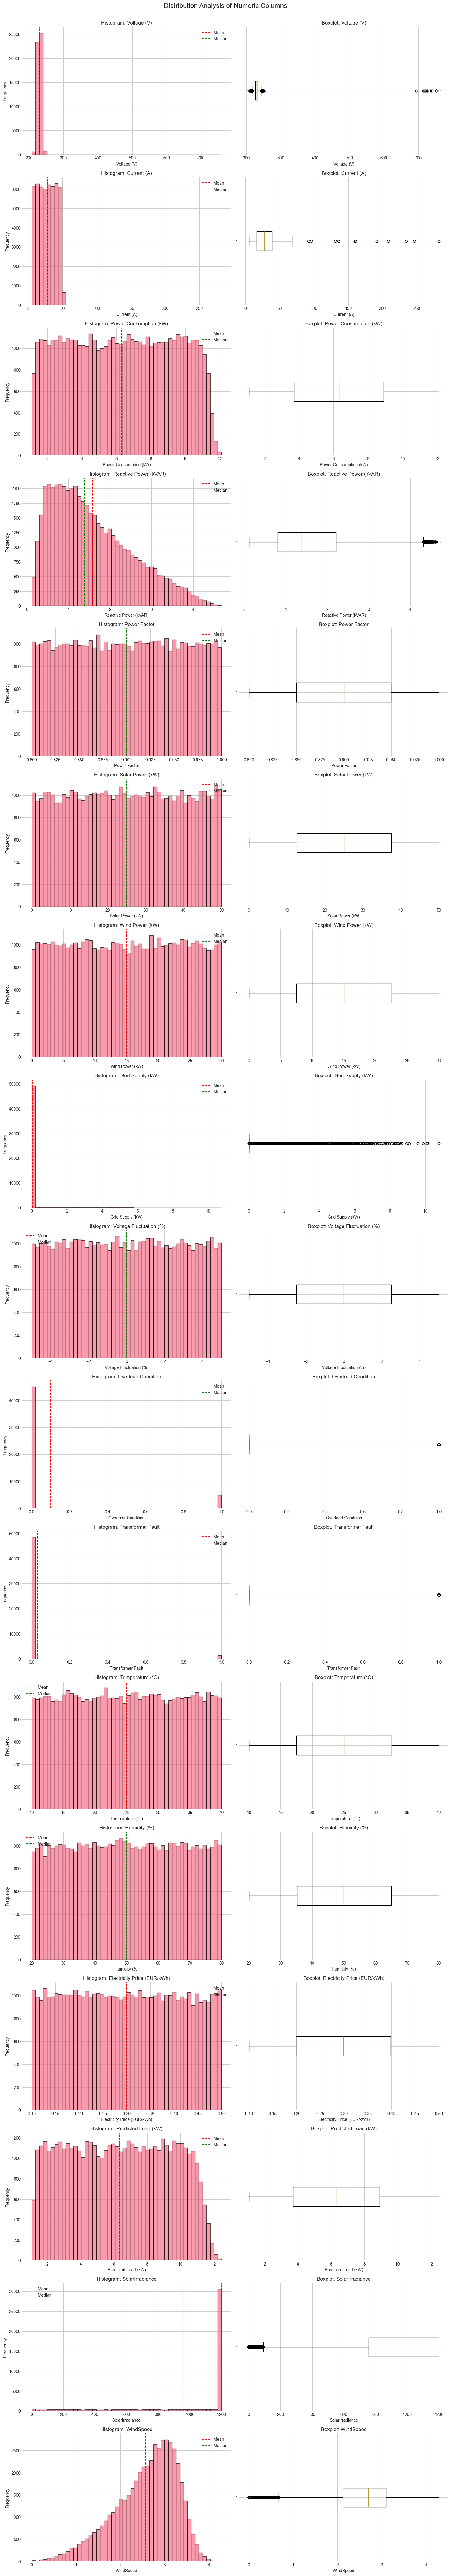


--- Creating correlation heatmap ---
 Saved: eda_correlation.png


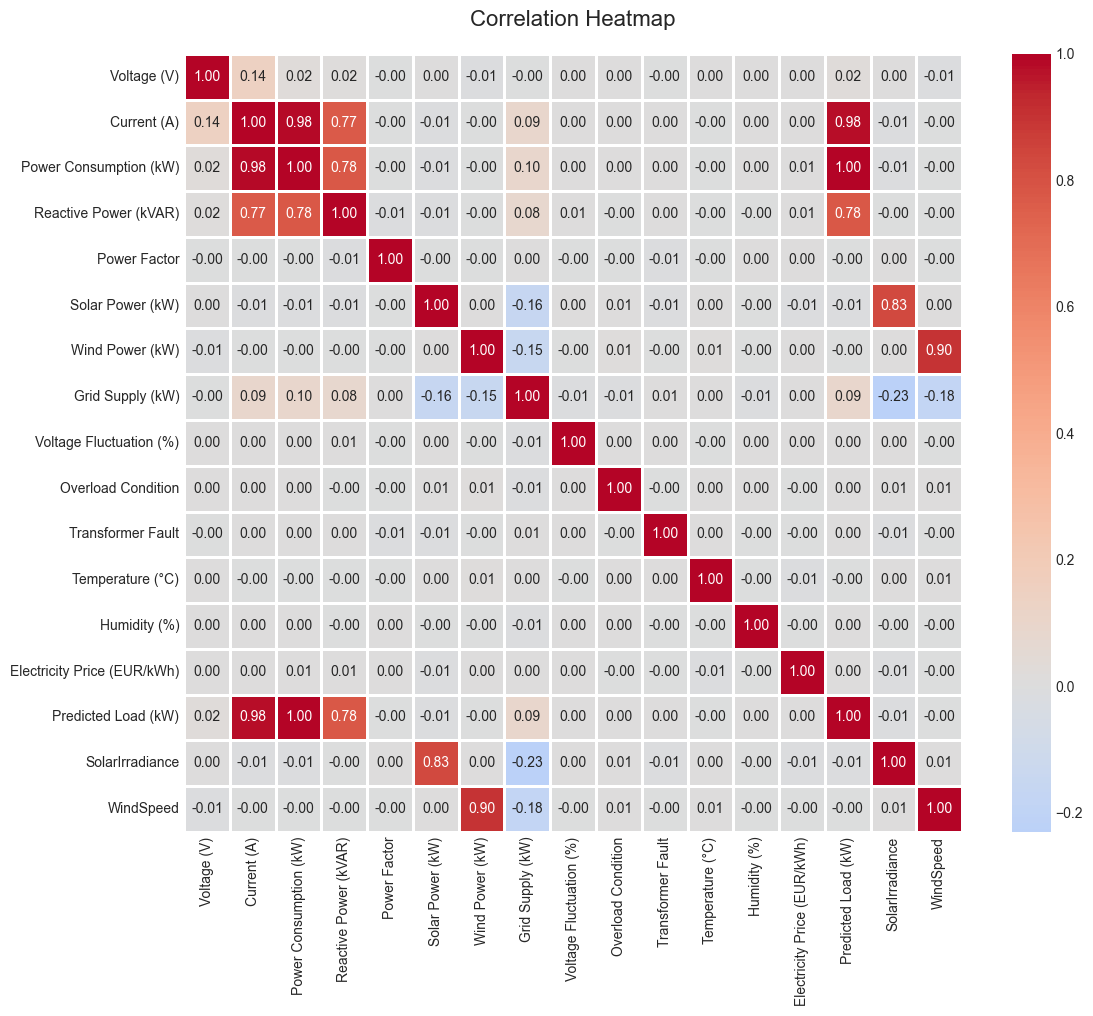


--- Categorical Columns Analysis ---

Timestamp:
Timestamp
2025-05-27 02:00:00    5
2024-01-09 18:00:00    5
2024-06-18 20:00:00    5
2024-08-29 06:00:00    5
2025-03-13 04:00:00    5
                      ..
2024-06-23 04:00:00    4
2024-06-23 08:00:00    4
2024-06-23 12:00:00    4
2024-06-23 16:00:00    4
2025-06-04 17:00:00    4
Name: count, Length: 12500, dtype: int64
 Saved: eda_timestamp.png


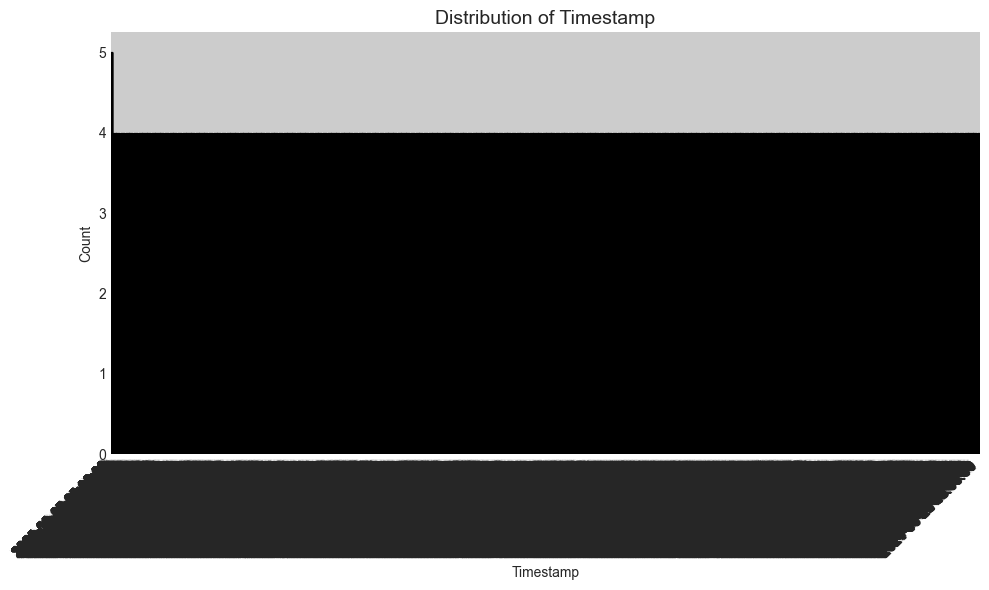


City:
City
Delhi          3128
Astana         3126
Bangkok        3126
Mumbai         3126
Seoul          3126
Shanghai       3126
Singapore      3126
Tokyo          3126
Beijing        3125
Dhaka          3125
Hanoi          3125
Jakarta        3125
Karachi        3125
KualaLumpur    3125
Manila         3125
Tashkent       3125
Name: count, dtype: int64
 Saved: eda_city.png


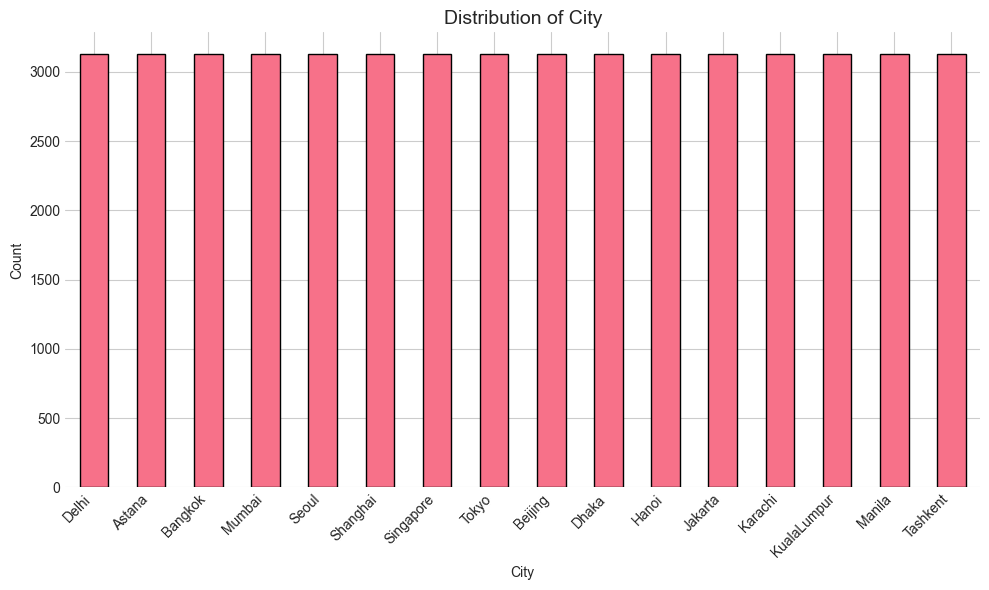


Name:
Name
Delhi_MainStation         3128
Astana_PowerPlant         3126
Bangkok_PowerSite         3126
Mumbai_TransformerUnit    3126
Seoul_EnergyHub           3126
Shanghai_LoadStation      3126
Singapore_LoadHub         3126
Tokyo_SolarStation        3126
Beijing_SubStation        3125
Dhaka_PowerUnit           3125
Hanoi_SolarPark           3125
Jakarta_EnergyNode        3125
Karachi_GridZone          3125
KualaLumpur_GridCenter    3125
Manila_WindField          3125
Tashkent_DataPoint        3125
Name: count, dtype: int64
 Saved: eda_name.png


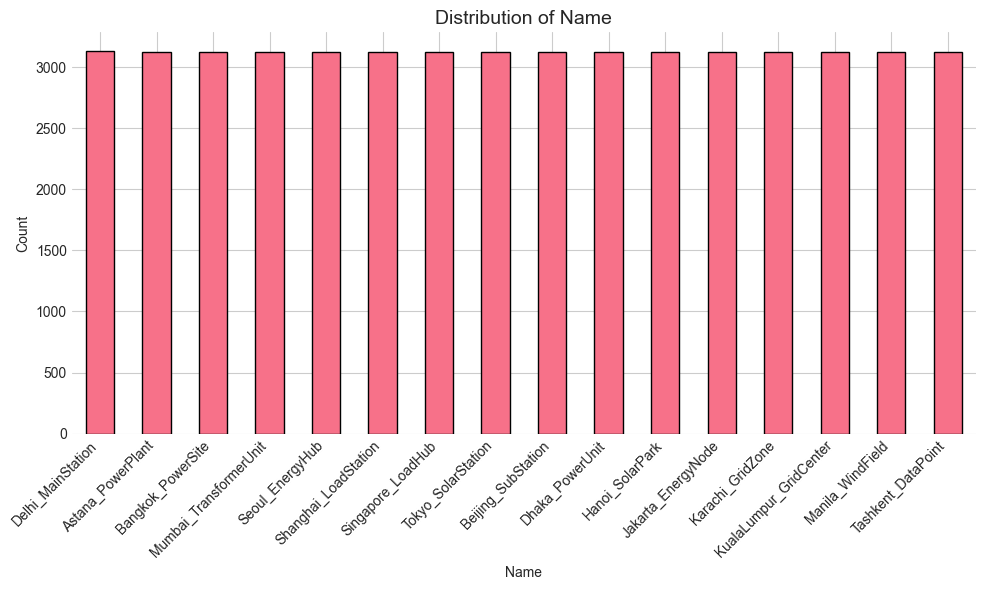


Country:
Country
India          6254
China          3126
Thailand       3126
South Korea    3126
Brunei         3126
Singapore      3126
Japan          3126
Mongolia       3125
Taiwan         3125
Vietnam        3125
Indonesia      3125
Bangladesh     3125
Malaysia       3125
Philippines    3125
Nepal          3125
Name: count, dtype: int64
 Saved: eda_country.png


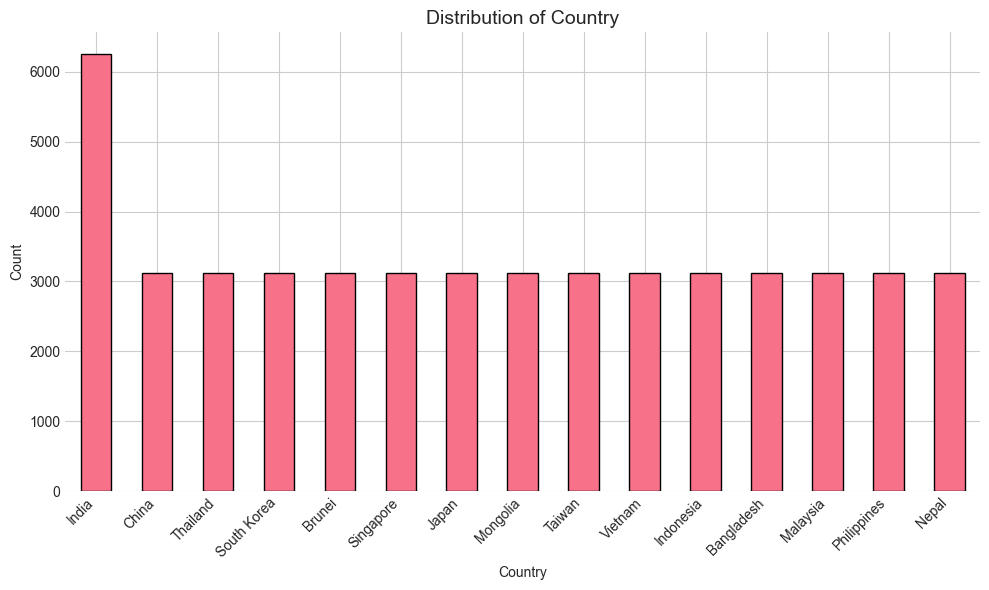


region:
region
Asia    50010
Name: count, dtype: int64
 Saved: eda_region.png


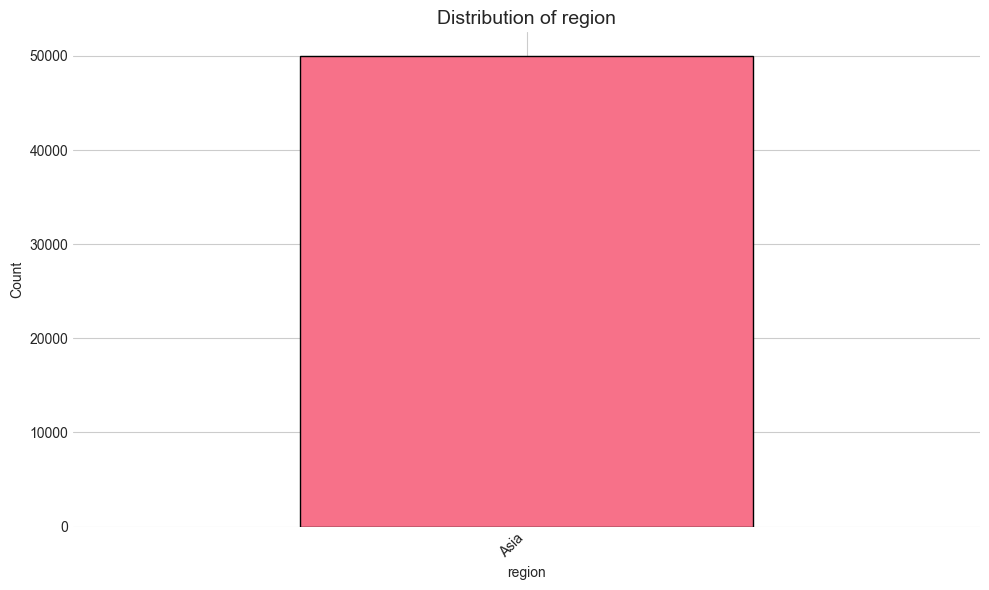


Sensor_ID:
Sensor_ID
S-BA4A9EB6    3128
S-9F42EE91    3126
S-519B55A8    3126
S-96CA97AA    3126
S-BB62F64D    3126
S-819A144B    3126
S-34AB90CA    3126
S-C88A27CD    3126
S-4AE863D1    3125
S-13A01E16    3125
S-F6E6D4AD    3125
S-70833DDD    3125
S-3C05F1EA    3125
S-A3048E5E    3125
S-6AB8CB24    3125
S-D0FA6407    3125
Name: count, dtype: int64
 Saved: eda_sensor_id.png


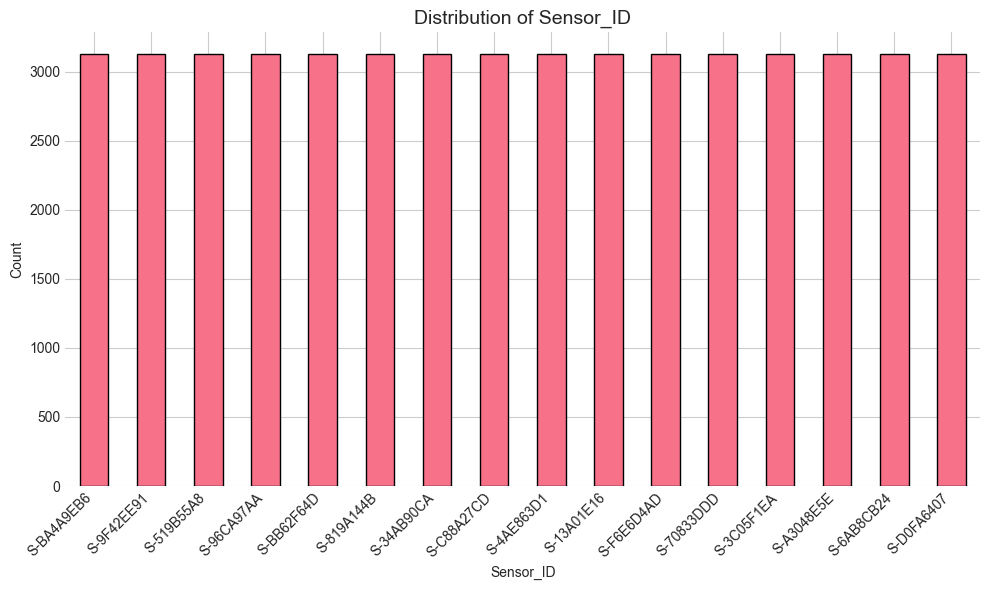


SensorType:
SensorType
SmartMeter         25006
IndustrialMeter    12503
AMI                12501
Name: count, dtype: int64
 Saved: eda_sensortype.png


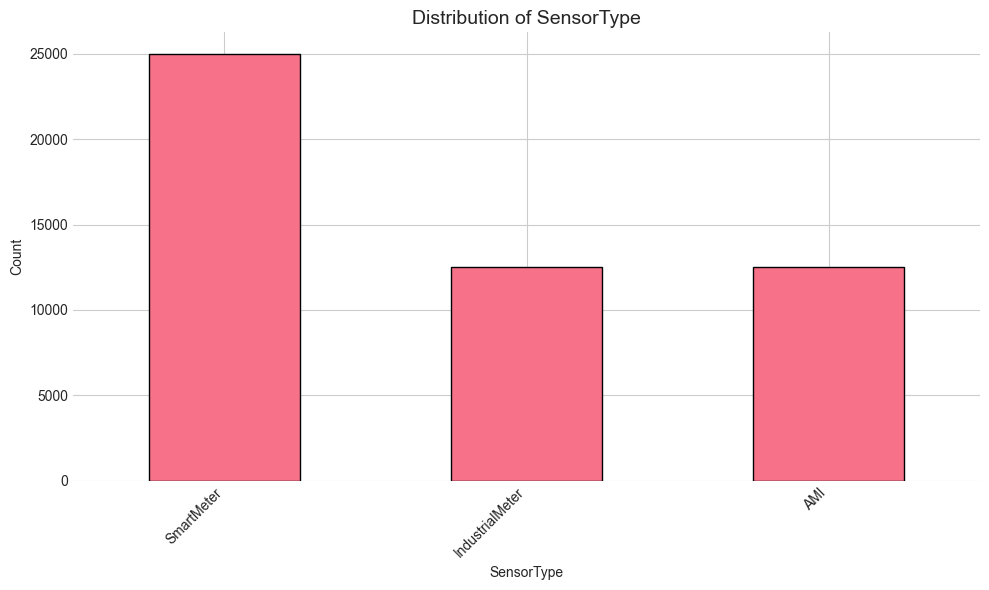


Manufacturer:
Manufacturer
Schneider     18755
ABB           18753
Siemens        6251
Landis+Gyr     6251
Name: count, dtype: int64
 Saved: eda_manufacturer.png


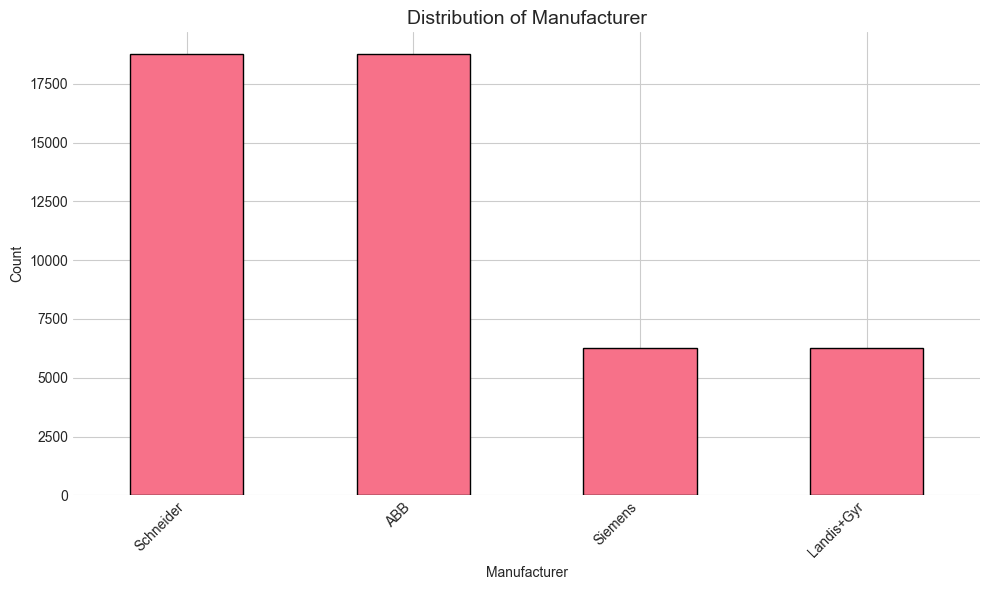


InstallationDate:
InstallationDate
2024-01-01 02:00:00    12504
2024-01-01 03:00:00    12502
2024-01-01 01:00:00    12501
2024-01-01 00:00:00    10641
2024-01-01              1862
Name: count, dtype: int64
 Saved: eda_installationdate.png


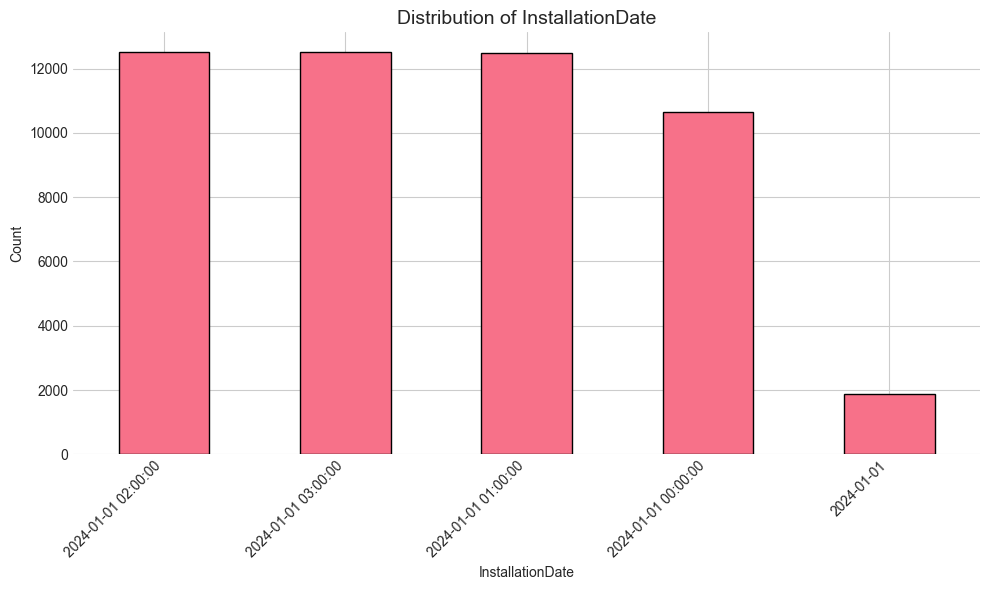


DecommissionStatus:
DecommissionStatus
Operational            31257
2025-08-01 00:00:00     3126
2024-10-18 00:00:00     3126
2025-11-22 00:00:00     3126
2024-06-03 00:00:00     3125
2025-07-28 00:00:00     3125
2024-12-05 00:00:00     3125
Name: count, dtype: int64
 Saved: eda_decommissionstatus.png


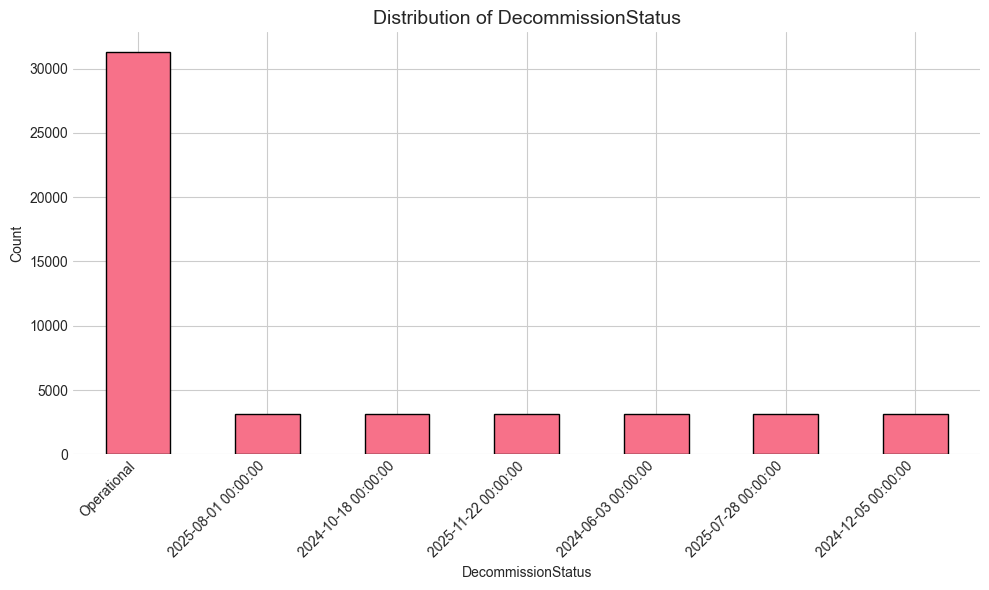

In [14]:
# =============================================================================
# STEP 6: VISUALIZATION (CRITICAL!)
# =============================================================================
print("\n" + "=" * 80)
print("STEP 6: DATA VISUALIZATION")
print("=" * 80)

# 6.1 Distribution Plots
print("\n--- Creating distribution plots ---")
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(15, 5 * len(numeric_cols)))
fig.suptitle('Distribution Analysis of Numeric Columns', fontsize=16, y=1.001)

for idx, col in enumerate(numeric_cols):
    # Histogram
    axes[idx, 0].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Histogram: {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx, 0].axvline(df[col].median(), color='green', linestyle='--', label='Median')
    axes[idx, 0].legend()

    # Boxplot
    axes[idx, 1].boxplot(df[col].dropna(), vert=False)
    axes[idx, 1].set_title(f'Boxplot: {col}')
    axes[idx, 1].set_xlabel(col)

plt.tight_layout()
plt.savefig('eda_distributions.png', dpi=300, bbox_inches='tight')
print(" Saved: eda_distributions.png")
plt.show()

# 6.2 Correlation Heatmap
if len(numeric_cols) > 1:
    print("\n--- Creating correlation heatmap ---")
    plt.figure(figsize=(12, 10))
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1)
    plt.title('Correlation Heatmap', fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig('eda_correlation.png', dpi=300, bbox_inches='tight')
    print(" Saved: eda_correlation.png")
    plt.show()

# 6.3 Missing Values Heatmap
if df.isnull().sum().sum() > 0:
    print("\n--- Creating missing values heatmap ---")
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=16)
    plt.tight_layout()
    plt.savefig('eda_missing_values.png', dpi=300, bbox_inches='tight')
    print(" Saved: eda_missing_values.png")
    plt.show()

# 6.4 Categorical Analysis (if exists)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\n--- Categorical Columns Analysis ---")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

        # Plot
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f'eda_{col.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
        print(f" Saved: eda_{col.lower().replace(' ', '_')}.png")
        plt.show()

<details>
<summary><strong>📊 Step 6 – Data Visualization (Click to Expand)</strong></summary>

### **City**
- All 16 cities have almost identical counts → dataset is evenly distributed across locations.

### **Country**
- India appears more frequently because multiple stations belong to India.
- All other countries show similar count distribution.

### **SensorType**
- **SmartMeter** is the most common type.
- **IndustrialMeter** and **AMI** appear in smaller but balanced amounts.
- Indicates more consumer-side monitoring than industrial usage.

### **Sensor_ID**
- All sensor IDs appear with identical frequency.
- Dataset is fully balanced at the sensor level.

### **Name (Station Name)**
- Each grid station name appears equally.
- Confirms equal representation by station.

### **Region**
- Only one region (**Asia**) → no variability → limited analytical value.

### **DecommissionStatus**
- Majority of sensors are **Operational**.
- Other statuses occur in small equal batches.

### **InstallationDate**
- Few installation timestamps dominate → installation done in batches.

### **Manufacturer**
- Schneider and ABB dominate the dataset.
- Siemens and Landis+Gyr appear less frequently.

### **Timestamp**
- Extremely high number of unique timestamps.
- Cannot be visualized as bars → best treated as time-series.

### **Numeric Distributions**
- Histograms show different shapes; boxplots reveal outliers.
- Several numerical variables are skewed.

### **Correlation Heatmap**
- Strong correlations:
- Current ↔ Power Consumption ↔ Predicted Load 
- Solar Power ↔ Solar Irradiance 
- Wind Power ↔ WindSpeed 
- Most other features show weak correlations.

</details>

### Step 7 – Data Cleaning Decisions
In this step, we use the EDA results to decide how to handle missing values, outliers, duplicates, irrelevant features, and whether any data transformations (such as scaling or normalization) are needed before cleaning.

In [16]:
# =============================================================================
# STEP 7: DECISION MAKING (Based on EDA findings)
# =============================================================================
print("\n" + "=" * 80)
print("STEP 7: DATA CLEANING DECISIONS (Based on EDA)")
print("=" * 80)

print("""
Based on the EDA analysis above, you should now decide:

1. Missing Values:
    Are missing values random or systematic?
    Should we fill them (mean/median/mode) or drop rows?
    Is there a pattern in missing data?

2. Outliers:
    Are outliers real data or errors?
    Should we remove, cap, or keep them?
    Do they represent important extreme cases?

3. Duplicates:
    Are they true duplicates or legitimate repeated measurements?

4. Feature Selection:
    Which columns are relevant for analysis?
    Are there highly correlated features to remove?

5. Data Transformation:
    Do we need normalization/standardization?
    Do we need to handle skewed distributions?

 STOP HERE and review all visualizations and statistics!
 Make informed decisions based on domain knowledge!
""")


STEP 7: DATA CLEANING DECISIONS (Based on EDA)

Based on the EDA analysis above, you should now decide:

1. Missing Values:
    Are missing values random or systematic?
    Should we fill them (mean/median/mode) or drop rows?
    Is there a pattern in missing data?

2. Outliers:
    Are outliers real data or errors?
    Should we remove, cap, or keep them?
    Do they represent important extreme cases?

3. Duplicates:
    Are they true duplicates or legitimate repeated measurements?

4. Feature Selection:
    Which columns are relevant for analysis?
    Are there highly correlated features to remove?

5. Data Transformation:
    Do we need normalization/standardization?
    Do we need to handle skewed distributions?

 STOP HERE and review all visualizations and statistics!
 Make informed decisions based on domain knowledge!



### Step 8 – Generate EDA Report
In this step, we automatically compile all key EDA results—dataset overview, data types, missing values, duplicates, outlier analysis, numeric summaries, categorical insights, and recommended cleaning actions—into a structured text report for review before data cleaning.

In [25]:
# =============================================================================
# STEP 8: GENERATE EDA REPORT
# =============================================================================
print("\n" + "=" * 80)
print("STEP 8: GENERATING EDA REPORT")
print("=" * 80)

report = f"""
EXPLORATORY DATA ANALYSIS REPORT
{'=' * 80}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. DATASET OVERVIEW
{'-' * 80}
   - Total Rows: {len(df):,}
   - Total Columns: {len(df.columns)}
   - Memory Usage: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB

2. DATA TYPES
{'-' * 80}
{df.dtypes.value_counts().to_string()}

3. MISSING VALUES
{'-' * 80}
   - Total Missing: {df.isnull().sum().sum():,}
   - Percentage: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%

Columns with Missing Values:
{missing_df.to_string() if len(missing_df) > 0 else '   None'}

4. DUPLICATE ROWS
{'-' * 80}
   - Total Duplicates: {duplicates:,}
   - Percentage: {duplicates / len(df) * 100:.2f}%

5. OUTLIER ANALYSIS
{'-' * 80}
{outlier_df.to_string()}

6. NUMERIC COLUMNS SUMMARY
{'-' * 80}
{df[numeric_cols].describe().to_string()}

7. CATEGORICAL COLUMNS
{'-' * 80}
{chr(10).join([f'{col}: {df[col].nunique()} unique values' for col in categorical_cols]) if len(categorical_cols) > 0 else '   None'}

8. RECOMMENDATIONS
{'-' * 80}
   Based on this analysis, consider:

   a) Missing Values:
      - Review patterns in missing data
      - Decide on imputation strategy

   b) Outliers:
      - {outlier_df['Outlier_Count'].sum():,} total outliers detected
      - Review if they are valid data points

   c) Data Quality:
      - {duplicates} duplicate rows found
      - Check for data entry errors

   d) Next Steps:
      - Make informed cleaning decisions
      - Document all transformations
      - Validate cleaned data

{'=' * 80}
"""

with open('C:\\0_DA\\iot-energy_data-analyst\\outputs\\1_result_eda_before_cleaning.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print(" EDA Report saved: eda_report.txt")
print("\n" + "=" * 80)
print("EDA COMPLETED - Review all outputs before cleaning!")
print("=" * 80)



STEP 8: GENERATING EDA REPORT
 EDA Report saved: eda_report.txt

EDA COMPLETED - Review all outputs before cleaning!
